In [1]:
import numpy as np
import pandas as pd
import json
import sys
import time
import math
import sklearn

import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
# Reading data
data = []
for line in open('sample for Lin.json', 'r'):
    data.append(json.loads(line))
    
# data = [json.loads(line) for line in open('sample for Lin.json', 'r')]

In [3]:
# Convert list of dictionary to data frame
d = []
for ele in data:
    
    tmp = {x["name"]: x["value"] for x in ele["metrics"] 
           if "name" in x and "value" in x}
    tmp["date"] = ele["date"]
    d.append(tmp)

df = pd.DataFrame.from_dict(d)

df.sort_index(axis = 1, inplace = True)

df.drop(['date'], axis = 1, inplace = True)

In [4]:
df.head(5)

,1201,1202,1203,1204,1206,1207,1208,1209,1210,1211,...,1709,1710,1711,1712,1716,1808,9902,9905,9906,9909
0,4.0,2.0,2.0,26.0,25952.0,NaN,NaN,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,2.0,NaN
1,107.0,47.0,60.0,2112.0,891655.0,NaN,47.0,NaN,21.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293.0,65.0,NaN
2,8.0,3.0,5.0,1027.0,190932.0,190932.0,3.0,3.0,8.0,3.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,32.0,5.0,NaN
3,6.0,4.0,2.0,90.0,97348.0,NaN,4.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,6.0,NaN
4,1.0,1.0,NaN,2.0,2780.0,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN


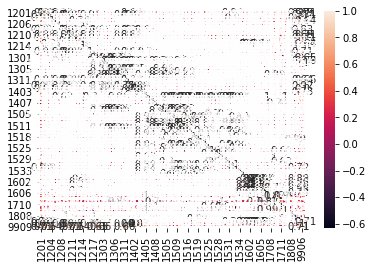

In [5]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [7]:
corrMatrix.iloc[:5, :5]

,1201,1202,1203,1204,1206
1201,1.000000,0.706453,0.968884,0.592285,0.174996
1202,0.706453,1.000000,0.507430,0.541074,0.156830
1203,0.968884,0.507430,1.000000,0.485339,0.171290
1204,0.592285,0.541074,0.485339,1.000000,0.234270
1206,0.174996,0.156830,0.171290,0.234270,1.000000


In [8]:
def get_features_corr(dataset, threshold):
    colnames = ['f1', 'f2', 'corr']
    lst_corr = []
    corr_mat = dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i+1, len(corr_mat.columns)):
            if (corr_mat.iloc[i, j] >= threshold):
                # print(corr_mat.index[i], corr_mat.columns[j])
                lst_corr.append([corr_mat.index[i], corr_mat.columns[j], corr_mat.iloc[i, j]])
    df_corr = pd.DataFrame(lst_corr, columns = colnames)
    return df_corr

In [9]:
df_corr = get_features_corr(df, threshold=0.98)
df_corr

,f1,f2,corr
0,1207,1214,0.999997
1,1207,1215,0.999998
2,1209,1217,0.999942
3,1209,1808,1.000000
4,1210,1211,0.997940
5,1214,1215,1.000000
6,1217,1808,0.999942
7,1303,9909,1.000000
8,1405,1531,0.986440
9,1405,1533,0.986639


In [10]:
df_sub2 = df[['1209', '1217', '1808']].replace(np.nan, 0)
print(df_sub2.shape)
df_sub2.head()

(301391, 3)


,1209,1217,1808
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,3.0,3.0,3.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [11]:
df_sub2.describe()

,1209,1217,1808
count,301391.000000,301391.000000,301391.000000
mean,0.019181,0.012193,0.019181
std,0.424240,0.230653,0.424240
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,175.000000,51.000000,175.000000


In [12]:
df_sub2.corr()

,1209,1217,1808
1209,1.000000,0.542882,1.000000
1217,0.542882,1.000000,0.542882
1808,1.000000,0.542882,1.000000


In [13]:
pd.crosstab(index = df_sub2['1209'], columns = 'count').head()

col_0,count
1209,
0.0,298598
1.0,1618
2.0,567
3.0,286
4.0,124


In [14]:
pd.crosstab(index = df_sub2['1217'], columns = 'count').head()

col_0,count
1217,
0.0,299572
1.0,1034
2.0,394
3.0,178
4.0,81


In [29]:
df.describe()

,1201,1202,1203,1204,1206,1207,1208,1209,1210,1211,...,1709,1710,1711,1712,1716,1808,9902,9905,9906,9909
count,297855.000000,297606.000000,141167.000000,290272.000000,2.654480e+05,2.753000e+03,171474.000000,2793.000000,296392.000000,296389.000000,...,63.000000,2.0,75.000000,1431.000000,3.0,2793.000000,3404.000000,299422.000000,239644.000000,3.000000
mean,16.584543,5.901544,22.550979,948.362825,9.564392e+05,2.292953e+05,5.650448,2.069817,4.714891,4.683379,...,2.333333,1.0,106.746667,2.490566,1.0,2.069817,0.694037,66.900164,9.123608,2.333333
std,31.111709,10.917234,31.840961,2328.408244,5.441098e+06,1.517724e+06,9.331759,3.896466,9.671395,9.648219,...,2.811268,0.0,213.972788,4.110504,0.0,3.896466,0.450895,140.581576,13.130766,2.309401
min,1.000000,1.000000,1.000000,1.000000,6.000000e+00,1.000000e+01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.0,1.000000,0.090633,1.000000,1.000000,1.000000
25%,2.000000,1.000000,4.000000,23.000000,1.679475e+04,3.075300e+04,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,6.500000,1.000000,1.0,1.000000,0.583933,6.000000,2.000000,1.000000
50%,5.000000,3.000000,11.000000,134.000000,9.129900e+04,7.922400e+04,2.000000,1.000000,2.000000,2.000000,...,1.000000,1.0,31.000000,1.000000,1.0,1.000000,0.583933,17.000000,5.000000,1.000000
75%,18.000000,7.000000,28.000000,896.000000,4.366080e+05,1.795410e+05,6.000000,2.000000,5.000000,5.000000,...,2.000000,1.0,81.000000,2.000000,1.0,2.000000,0.583933,66.000000,11.000000,3.000000
max,2665.000000,2665.000000,822.000000,86539.000000,1.381204e+09,6.953720e+07,748.000000,175.000000,2665.000000,2665.000000,...,20.000000,1.0,1050.000000,50.000000,1.0,175.000000,11.094725,4914.000000,834.000000,5.000000


## Implement Multi-ZIGP distribution

MM algorithm: explicit MM iterations for 
$\phi^{(t)}$, $\lambda^{(t)}$, $\theta^{(t)}$, and $\beta^{(t)} = \phi^{(t)} + (1 - \phi^{(t)}) e^{-\lambda_{+}^{(t)}}$ where $\lambda_{+}^{(t)} = \sum_{i=1}^m \lambda_i^{(t)}$

- $n$: total number of data points
- $n_0 = \#\{j|y_{j} = 0, j = 1, \dots, n  \} = \sum_{j=1}^n I(y_j = 0)$
- $\# \{j| y_j \neq 0, j = 1, \dots, n \} = n - n_0 $
- $n_{i0} = \#\{j|y_{ij} = 0, y_j \neq 0, j = 1, \dots, n  \}$
- $\# \{j| y_{ij} \neq 0, j = 1, \dots, n \} = n - n_0 - n_{i0}$

In [18]:
def MM_iter(dat, phi0, lambda0, theta0, max_iter, eps=1e-5):
    
    phi_old, lambda_old, theta_old = phi0, lambda0, theta0
    
    n, m = dat.shape[0], dat.shape[1]
    n0 = (dat.sum(axis = 1) == 0).sum() # n_0

    iteration = 0
    while iteration < max_iter:  
        print('iteration =', iteration)
        
        lambda_plus_old = sum(lambda_old.values())
        beta_old = phi_old + (1 - phi_old)*np.exp(-lambda_plus_old)
        
        # phi_new
        phi_new = (n0*phi_old) / (n*beta_old)
        print('phi = {:.2f}'.format(phi_new))

        lambda_new, theta_new = {}, {}

        for i in range(m):
            # print("i = ", i)
            ni0 = (dat[dat.sum(axis = 1) != 0].iloc[:, i] == 0).sum() # n_{i0}
            
            # lambda_new: i
            y_nonzero_ij = dat[(dat.iloc[:,i] != 0)].iloc[:, i] 

            lambda_new[i] = (n - n0 - ni0 + sum(((y_nonzero_ij - 1)*lambda_old[i]) \
                               / (lambda_old[i] + theta_old[i]*y_nonzero_ij))) / (n - n*phi_new)
            # print('lambda_{} = {:.2f}'.format(i, lambda_new[i]))

            theta_new[i] = (theta_old[i]*y_nonzero_ij*(y_nonzero_ij - 1)/(lambda_old[i] + theta_old[i]*y_nonzero_ij)).sum() \
                                / y_nonzero_ij.sum()
            # print('theta_{} = {:.2f}'.format(i, theta_new[i]))
            
        iteration += 1
        
        rel_phi = np.linalg.norm(phi_new - phi_old) / \
                    (np.linalg.norm(phi_old)+0.001)
        rel_lambda = np.linalg.norm(np.array(list(lambda_new.values())) - np.array(list(lambda_old.values())), ord=1) / \
                    (np.linalg.norm(np.array(list(lambda_old.values())), ord=1)+0.001)
        rel_theta = np.linalg.norm(np.array(list(theta_new.values())) - np.array(list(theta_old.values())), ord=1) / \
                    (np.linalg.norm(np.array(list(theta_old.values())), ord=1)+0.001)
        print('relative difference: {:.3f}, {:.3f}, {:.3f}'.format(rel_phi, rel_lambda, rel_theta))
        if (rel_phi < eps and rel_lambda < eps and rel_theta < eps) or iteration == max_iter - 1:
            break
        phi_old, lambda_old, theta_old = phi_new, lambda_new, theta_new
        print('\n')
        
    return {'phi': phi_new, 'lambda': lambda_new, 'theta': theta_new}
        
        

In [39]:
def loglh(dat, phi_est, lambda_est, theta_est):
    
    n, m = dat.shape[0], dat.shape[1]
    n0 = (dat.sum(axis = 1) == 0).sum() # n_0

    lambda_plus_est = sum(lambda_est.values())
    
    # version 1:
    lh_term1 = n0*np.log(phi_est + (1 - phi_est)*np.exp(-lambda_plus_est))
    
    lh_term2 = (n - n0)*np.log(1 - phi_est)

    lh_term3, lh_term4 = 0, 0
    for i in range(m):
        ni0 = (dat[dat.sum(axis = 1) != 0].iloc[:, i] == 0).sum()
    
        lh_term3 += ni0*lambda_est[i]
        
        y_nonzero_ij = dat[(dat.iloc[:,i] != 0)].iloc[:, i]
        lh_term4 += sum(np.log(lambda_est[i]) \
                    + (y_nonzero_ij - 1)*np.log(lambda_est[i] + theta_est[i]*y_nonzero_ij) \
                    - lambda_est[i] - theta_est[i]*y_nonzero_ij)
    
    loglh = lh_term1 + lh_term2 - lh_term3 + lh_term4
    
    # version 2:
    lh2_term1 = lh_term1
    
    lh2_term2 = lh_term2
    
    lh2_term3 = (n - n0)*lambda_plus_est
    
    lh2_term4 = 0
    for i in range(m):
        lh2_term4 += np.log(lambda_est[i]) \
                + (dat.iloc[:, i] - 1)*np.log(lambda_est[i] + theta_est[i]*dat.iloc[:, i]) \
                - theta_est[i]*dat.iloc[:, i]
    
    loglh2 = lh2_term1 + lh2_term2 - lh2_term3 + sum(lh2_term4)
    
    k = 1 + 2*m
    aic = 2*k - 2*loglh
    bic = k*np.log(n) - 2*loglh
    return {'loglh': loglh, 
            'loglh2': loglh2,
            'aic': aic, 
            'bic': bic}
    

In [40]:
## Initial values: \phi, \lambda, \theta
# \phi = 0.5, \lambda = 1, \theta = 0.2

phi0 = 0.5
lambda0 = {0: 0.5, 1: 1, 2: 1.5}
theta0 = {0: 0.2, 1: 0.2, 2: 0.2}


(1) for metrics: '1209', '1217', '1808'

In [41]:
df_sub1 = df[['1209', '1217', '1808']].replace(np.nan, 0)
print(df_sub1.corr())

dat = df_sub1

MM_estimates = MM_iter(dat, phi0, lambda0, theta0, max_iter=500)

          1209      1217      1808
1209  1.000000  0.542882  1.000000
1217  0.542882  1.000000  0.542882
1808  1.000000  0.542882  1.000000
iteration = 0
phi = 0.94
relative difference: 0.886, 0.781, 0.336


iteration = 1
phi = 0.96
relative difference: 0.018, 0.130, 0.603


iteration = 2
phi = 0.97
relative difference: 0.011, 0.336, 0.052


iteration = 3
phi = 0.98
relative difference: 0.009, 0.454, 0.030


iteration = 4
phi = 0.99
relative difference: 0.006, 0.486, 0.063


iteration = 5
phi = 0.99
relative difference: 0.003, 0.368, 0.096


iteration = 6
phi = 0.99
relative difference: 0.001, 0.182, 0.111


iteration = 7
phi = 0.99
relative difference: 0.000, 0.076, 0.092


iteration = 8
phi = 0.99
relative difference: 0.000, 0.036, 0.062


iteration = 9
phi = 0.99
relative difference: 0.000, 0.019, 0.039


iteration = 10
phi = 0.99
relative difference: 0.000, 0.011, 0.024


iteration = 11
phi = 0.99
relative difference: 0.000, 0.006, 0.014


iteration = 12
phi = 0.99
relative differe

In [42]:
MM_estimates['phi'], MM_estimates['lambda'], MM_estimates['theta']

(0.990565709565449,
 {0: 1.563823905892398, 1: 0.9049338371312023, 2: 1.5638239144342314},
 {0: 0.2308263467621648, 1: 0.29983724394892564, 2: 0.2308263425608261})

In [43]:
phi_est = MM_estimates['phi']
lambda_est = MM_estimates['lambda']
theta_est = MM_estimates['theta']

loglh(dat, phi_est, lambda_est, theta_est)

{'loglh': -19738.92359577084,
 'loglh2': -19738.92359577078,
 'aic': 39491.84719154168,
 'bic': 39566.16033747023}

(2) for metrics: '1203', '1711', '9905'

In [44]:
df_sub2 = df[['1207', '1214', '1215']].replace(np.nan, 0)
print(df_sub2.corr())

dat = df_sub2

MM_estimates = MM_iter(dat, phi0, lambda0, theta0, max_iter=500)

          1207      1214      1215
1207  1.000000  0.194554  0.417945
1214  0.194554  1.000000  0.465533
1215  0.417945  0.465533  1.000000
iteration = 0
phi = 0.94
relative difference: 0.880, 0.259, 3.993


iteration = 1
phi = 0.98
relative difference: 0.043, 0.220, 0.000


iteration = 2
phi = 0.99
relative difference: 0.004, 0.336, 0.000


iteration = 3
phi = 0.99
relative difference: 0.001, 0.264, 0.000


iteration = 4
phi = 0.99
relative difference: 0.000, 0.177, 0.000


iteration = 5
phi = 0.99
relative difference: 0.000, 0.118, 0.000


iteration = 6
phi = 0.99
relative difference: 0.000, 0.080, 0.000


iteration = 7
phi = 0.99
relative difference: 0.000, 0.056, 0.000


iteration = 8
phi = 0.99
relative difference: 0.000, 0.040, 0.000


iteration = 9
phi = 0.99
relative difference: 0.000, 0.029, 0.000


iteration = 10
phi = 0.99
relative difference: 0.000, 0.021, 0.000


iteration = 11
phi = 0.99
relative difference: 0.000, 0.016, 0.000


iteration = 12
phi = 0.99
relative differe

In [45]:
MM_estimates['phi'], MM_estimates['lambda'], MM_estimates['theta']

(0.9878760850419156,
 {0: 3.051004240567106, 1: 2.7935085487129325, 2: 0.9631771214860757},
 {0: 0.9999823390309519, 1: 0.9999782295164107, 2: 0.9999906045401555})

In [46]:
phi_est = MM_estimates['phi']
lambda_est = MM_estimates['lambda']
theta_est = MM_estimates['theta']

loglh(dat, phi_est, lambda_est, theta_est)

{'loglh': 18862282930.294674,
 'loglh2': 18862282930.29471,
 'aic': -37724565846.58935,
 'bic': -37724565772.2762}

### Inward testing procedure with sample maximum

1. identify the starting point by calculating the 95% cdf point

In [24]:
dat.head()

,1209,1217,1808
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,3.0,3.0,3.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [25]:
# Define factorial function: n! = 1*2*...*n
def cal_factorial(num):
    factorial = 1
 
    if num < 0:
        print("Error: negative number")
    elif num == 0:
        factorial = 1
        #print("0! = 1")
    else:
        for i in range(1,num + 1):
            factorial = factorial*i
        #print("%d! = %d" %(num,factorial))
    return factorial

cal_factorial(3)

6

In [26]:
# Joint cumulative distribution function of y

def cal_cdf(tmp_dat, phi_est, lambda_est, theta_est):
    n, m = tmp_dat.shape[0], tmp_dat.shape[1]
    cdf_vec = np.zeros(n)
    
    for j in range(n):
        if any(c == 0 for c in tmp_dat.iloc[j, :]):
            cdf_vec[j] = phi_est
        else:
            tmp_p = 1
            for i in range(m):
                tmp_p *= sum([(lambda_est[i]*(lambda_est[i]+theta_est[i]*k)**(k-1))* \
                                np.exp(-lambda_est[i]-theta_est[i]*k)/cal_factorial(int(k)) \
                                for k in tmp_dat.iloc[i, :]])
            cdf_vec[j] = phi_est + (1 - phi_est)*tmp_p
    return cdf_vec

In [27]:
cdf_vec = cal_cdf(dat, phi_est, lambda_est, theta_est)

In [28]:
cdf_vec.min(), cdf_vec.max()

(0.990565709565449, 0.9935637441815658)